In [2]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

df = pd.read_csv("C:/SharedFolders/metagenomics/tim_sheep/viral_association/flye4.contigs.vassoc.final.tab", sep="\t", header=0)
df.describe()

,VirusCtg,HostCtg,Category,VirusGenus,HostKingdom,HostGenus,Evidence
count,424,424,424,424,424,424,424
unique,174,337,3,23,5,98,110
top,contig_48319,contig_76462,Read,Siphoviridae,Bacteria,Methanobrevibacter,Read:3
freq,43,5,356,200,248,88,69


OK, data is loaded. Let's remove the cases where the HostKingdom is also "Viruses" so we can generate a bipartite plot.

In [6]:
df = df[df['HostKingdom'] != 'Viruses']
df.describe()

,VirusCtg,HostCtg,Category,VirusGenus,HostKingdom,HostGenus,Evidence
count,382,382,382,382,382,382,382
unique,157,303,3,23,4,89,89
top,contig_48319,contig_29921,Read,Siphoviridae,Bacteria,Methanobrevibacter,Read:3
freq,43,5,356,174,248,88,69


## More data filtering

I may have removed some legitimate viral contig associations, or some degenerate prophage that serve as targets for viral integration. This is a known biological mechanism for integration; however, I can't make a bipartite plot without the removal of these contigs! My goal is to create the bipartite plot sorted by viral class to test any associations of viral detection strategy with their putative lifecycles.

In [ ]:
df.head()

In [9]:
df = df.sort_values(by=['VirusGenus','VirusCtg','Category'])
df.head()

,VirusCtg,HostCtg,Category,VirusGenus,HostKingdom,HostGenus,Evidence
134,contig_29900,contig_29897,Read,Ackermannviridae,no-hit,no-hit,Read:15
135,contig_29900,contig_43786,Read,Ackermannviridae,Bacteria,Clostridium,Read:5
232,contig_45244,contig_26814,Read,Brussowvirus,Bacteria,Duncaniella,Read:14
233,contig_45244,contig_26815,Read,Brussowvirus,Bacteria,Prevotella,Read:480
234,contig_45244,contig_68877,Read,Brussowvirus,Bacteria,Prevotella,Read:25


## Now for the plotting!

I'm going to load the network plot using the first two columns, but then classify nodes by host kingdom/viral genera and edges by method

In [13]:
from collections import defaultdict

graph = nx.Graph()
vgenus = defaultdict(list)
hking = defaultdict(list)
ecat = defaultdict(list)

graph.add_nodes_from(df['VirusCtg'].unique())
graph.add_nodes_from(df['HostCtg'].unique())

for index, row in df.iterrows():
    vgenus[row['VirusGenus']].append(row['VirusCtg'])
    hking[row['HostKingdom']].append(row['HostCtg'])
    graph.add_edge(row['VirusCtg'], row['HostCtg'])
    ecat[row['Category']].append((row['VirusCtg'], row['HostCtg']))

Viral Genus Ackermannviridae color: aliceblue
Viral Genus Brussowvirus color: antiquewhite
Viral Genus Cequinquevirus color: aqua
Viral Genus Chlorovirus color: aquamarine
Viral Genus Efquatrovirus color: azure
Viral Genus Herelleviridae color: beige
Viral Genus Jilinvirus color: bisque
Viral Genus Lightbulbvirus color: black
Viral Genus Microviridae color: blanchedalmond
Viral Genus Mimivirus color: blue
Viral Genus Moineauvirus color: blueviolet
Viral Genus Myoviridae color: brown
Viral Genus Peduovirus color: burlywood
Viral Genus Phifelvirus color: cadetblue
Viral Genus Podoviridae color: chartreuse
Viral Genus Punavirus color: chocolate
Viral Genus Salasvirus color: coral
Viral Genus Sextaecvirus color: cornflowerblue
Viral Genus Siphoviridae color: cornsilk
Viral Genus Tijeunavirus color: crimson
Viral Genus Vegasvirus color: cyan
Viral Genus Vicosavirus color: darkblue
Viral Genus Viruses color: darkcyan
Host kingdom no-hit color: b
Host kingdom Bacteria color: g
Host kingdom Eu

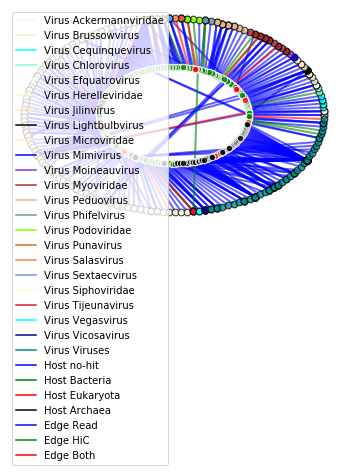

In [30]:
pos = nx.shell_layout(graph, [df['HostCtg'].unique(), df['VirusCtg'].unique()])

#vcolors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
vcolors = [name for name, color in matplotlib.colors.CSS4_COLORS.items()]
hcolors = ['b', 'g', 'r', 'k']
ecolors = {"Read" : 'b', "HiC" : 'g', "Both" : 'r'}

f = plt.figure(1)
ax = f.add_subplot(1,1,1)

labels = dict()

for i in range(len(vgenus.keys())):
    k = list(vgenus.keys())[i]
    if i >= len(vcolors):
        i = len(vcolors) - 1
    print(f'Viral Genus {k} color: {vcolors[i]}')
    labels['Virus ' + k] = vcolors[i]
    nx.draw_networkx_nodes(graph, pos, nodelist=vgenus[k], node_color=vcolors[i], edgecolors='k', alpha=0.8, node_size=50, node_shape='8')
    
for i in range(len(hking.keys())):
    k = list(hking.keys())[i]
    if i >= 4:
        i = 3
    print(f'Host kingdom {k} color: {hcolors[i]}')
    labels['Host ' + k] = hcolors[i]
    nx.draw_networkx_nodes(graph, pos, nodelist=hking[k], node_color=hcolors[i], edgecolors='w', alpha=0.8, node_size=40, node_shape='o')
    
for k, v in ecolors.items():
    labels['Edge ' + k] = ecolors[k]
    nx.draw_networkx_edges(graph, pos, edgelist=ecat[k], width=2, alpha=0.6, edge_color=ecolors[k])
    
for k, v in labels.items():
    ax.plot([0], [0], color = v, label=k)
    
plt.axis('off')
f.set_facecolor('w')

plt.legend()
plt.savefig("C:/SharedFolders/metagenomics/tim_sheep/viral_association/hifi_flye4_networkplot.pdf")